In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from models import IBGAN
from trainer import train

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
BATCH_SIZE = 128
Z_DIM = 500
R_DIM = 15
NDF = 64
NGF = 64
N_EPOCHS = 200
LOG_INTERVAL = 25

LAMBDA_G = 1
BETA_KL = 0.3
DATA_ROOT = "/content/drive/My Drive/data"

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
args_dict = {"BATCH_SIZE": BATCH_SIZE, "Z_DIM": Z_DIM, "R_DIM": R_DIM, "NDF": NDF, "NGF": NGF, "N_EPOCHS": N_EPOCHS, 
             "LAMBDA_G": LAMBDA_G, "BETA_KL": BETA_KL, "device": device, "DATA_ROOT": DATA_ROOT, "LOG_INTERVAL": LOG_INTERVAL}

In [6]:
lr = 1e-5
IBGAN_model = IBGAN(NGF, NDF, Z_DIM, R_DIM, lr, lr, lr, lr)
IBGAN_model = IBGAN_model.to(device)

-------- training --------


 12%|█▎        | 25/200 [14:54<1:42:14, 35.05s/it]

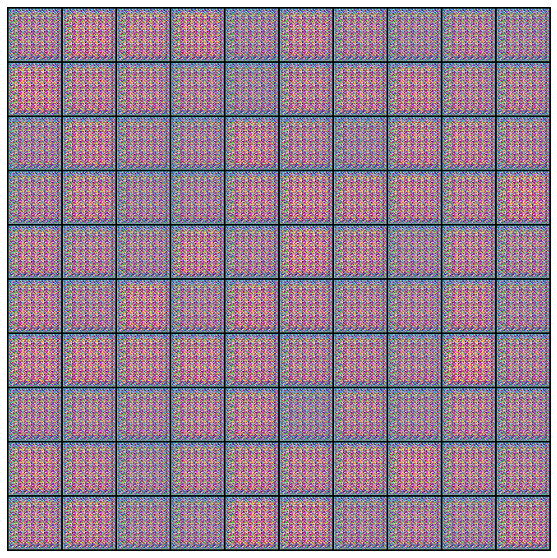

 13%|█▎        | 26/200 [15:34<1:45:48, 36.49s/it]

D(x): 0.99249    D(G(z)): 0.06646    D_kl: 0.42428    G(z): 0.00851    Z_rec: 1.21643    R_kl: 2.37918


 25%|██▌       | 50/200 [25:06<04:10,  1.67s/it]

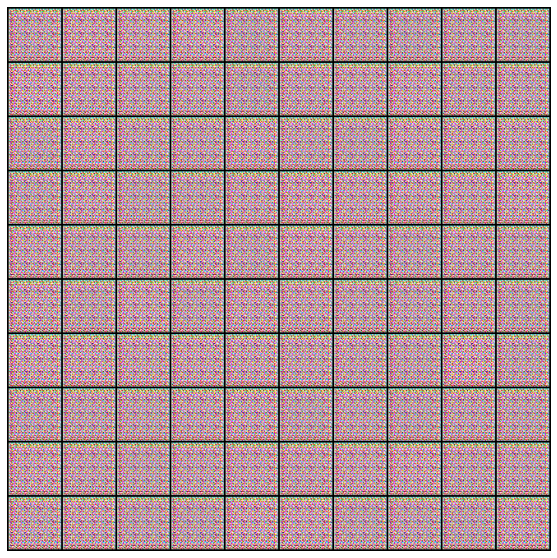

 26%|██▌       | 51/200 [25:07<03:25,  1.38s/it]

D(x): 0.99610    D(G(z)): 0.00354    D_kl: 0.25684    G(z): 0.00010    Z_rec: 1.17881    R_kl: 1.88152


 38%|███▊      | 75/200 [25:18<00:56,  2.19it/s]

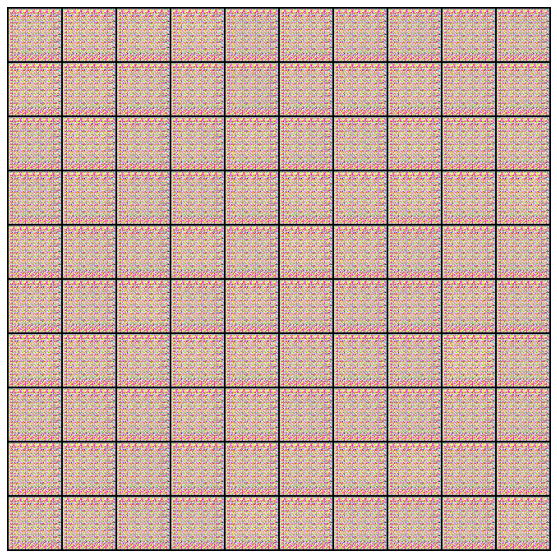

 38%|███▊      | 76/200 [25:18<01:06,  1.86it/s]

D(x): 0.99653    D(G(z)): 0.00267    D_kl: 0.19609    G(z): 0.00010    Z_rec: 1.18280    R_kl: 1.79193


 50%|█████     | 100/200 [25:29<00:42,  2.36it/s]

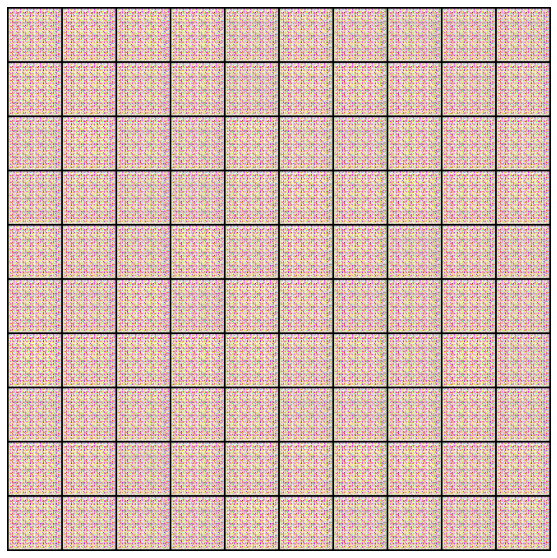

 50%|█████     | 101/200 [25:30<00:49,  1.98it/s]

D(x): 0.99672    D(G(z)): 0.00212    D_kl: 0.16915    G(z): 0.00007    Z_rec: 1.19512    R_kl: 1.72863


 62%|██████▎   | 125/200 [25:40<00:31,  2.37it/s]

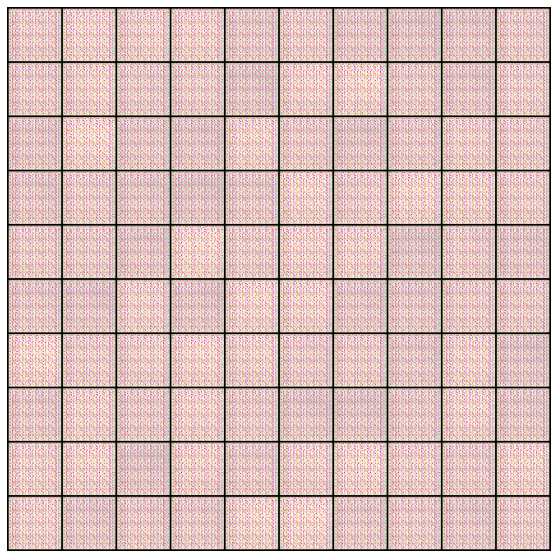

 63%|██████▎   | 126/200 [25:40<00:37,  1.98it/s]

D(x): 0.99775    D(G(z)): 0.00125    D_kl: 0.14852    G(z): 0.00010    Z_rec: 1.20518    R_kl: 1.68847


 75%|███████▌  | 150/200 [25:51<00:21,  2.37it/s]

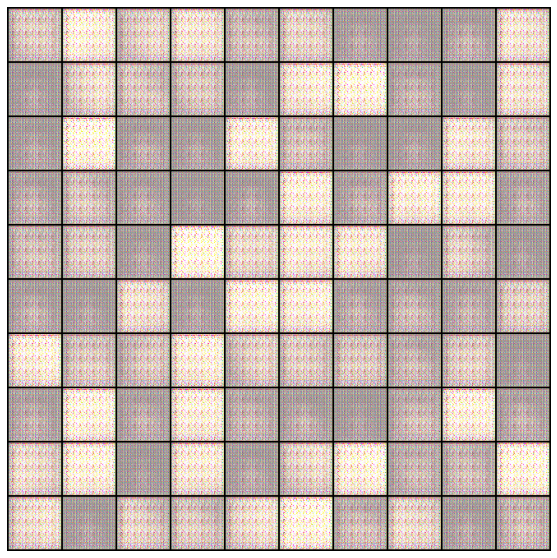

 76%|███████▌  | 151/200 [25:51<00:24,  1.97it/s]

D(x): 0.99773    D(G(z)): 0.00157    D_kl: 0.13263    G(z): 0.00025    Z_rec: 1.27375    R_kl: 1.67885


 88%|████████▊ | 175/200 [26:02<00:10,  2.38it/s]

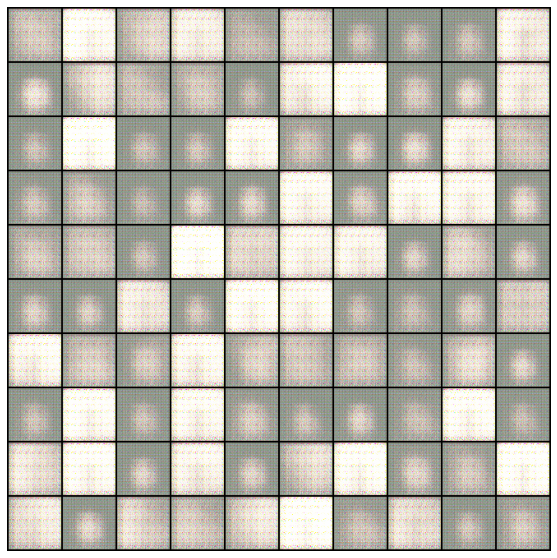

 88%|████████▊ | 176/200 [26:02<00:12,  1.96it/s]

D(x): 0.99730    D(G(z)): 0.00237    D_kl: 0.12234    G(z): 0.00055    Z_rec: 1.36035    R_kl: 1.67141


100%|██████████| 200/200 [26:12<00:00,  7.86s/it]


In [7]:
d_loss, r_loss = train(IBGAN_model, args_dict)

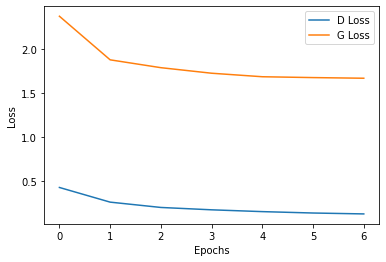

In [10]:
plt.plot(range(len(d_loss)), d_loss, label="D Loss")
plt.plot(range(len(r_loss)), r_loss, label="G Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()